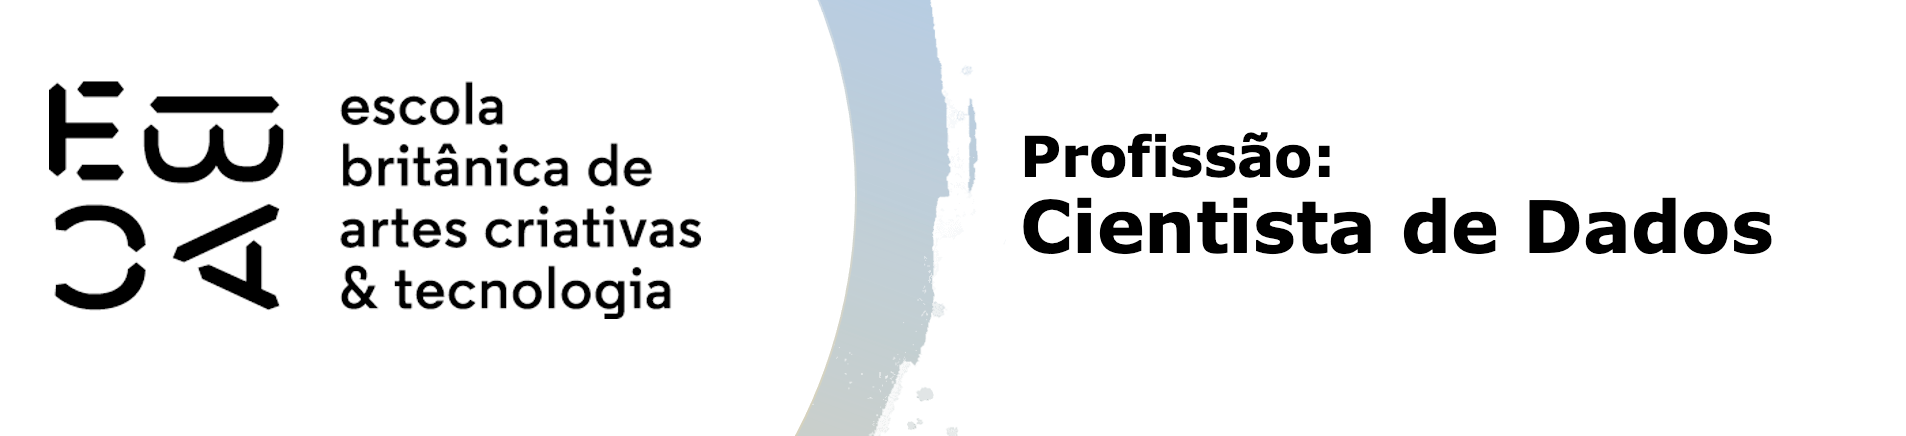

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [58]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


### 1 Substitua missings pela média

In [60]:
# Carregar os dados
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II.csv')

# Substituir valores ausentes pela média
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verificar se há valores ausentes restantes
missing_data = df.isnull().sum()
print("Valores ausentes por coluna após tratamento:")
print(missing_data)

# Mostrar os primeiros registros da base tratada
print("\nPrimeiros registros da base tratada:")
print(df.head())


Valores ausentes por coluna após tratamento:
data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

Primeiros registros da base tratada:
     data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
0  2015-01-01   5762    M                S               N           0   
1  2015-01-01   1279    M                S               N           0   
2  2015-01-01  14111    M                S               N           0   
3  2015-01-01   8189    M                N               S           2   
4  2015-01-01   1830    F                N               S           2   

    tipo_renda             educacao estado_civil tipo_residencia  idade  \
0   Em

### 1.2 Análise dos Dados Após o Tratamento

Após o tratamento dos dados, não há valores ausentes em nenhuma coluna, indicando que o processo de imputação foi bem-sucedido. As primeiras linhas da base tratada mostram variáveis categóricas, como `sexo`, `posse_de_veiculo` e `tipo_renda`, e numéricas, como `idade`, `tempo_emprego` e `renda`. As variáveis categóricas foram adequadamente codificadas para modelagem, e o dataset está pronto para análises e construção de modelos preditivos. O tratamento garante consistência nos dados, eliminando problemas como valores nulos ou inconsistências que poderiam impactar negativamente o desempenho do modelo.


## 2 Variável renda

### 2.1 Explicação do Código

Este código implementa um pipeline de tratamento de dados e criação de um modelo de regressão linear para prever a variável `renda`. Primeiramente, valores ausentes são preenchidos com a média das colunas numéricas para evitar inconsistências. A variável `renda` é transformada com a função logarítmica para reduzir a variabilidade e tornar a distribuição mais simétrica. As colunas irrelevantes, como `data_ref` e `index`, são excluídas, e variáveis categóricas, como `sexo` e `tipo_renda`, são convertidas em variáveis numéricas por meio do método One-Hot Encoding. Os dados são divididos em conjuntos de treino e teste, sendo o modelo treinado com o conjunto de treino. O modelo realiza previsões no conjunto de teste, e o desempenho é avaliado usando a métrica RMSE. Por fim, os coeficientes do modelo são exibidos, permitindo análise da importância de cada variável na previsão de `renda`.


In [61]:
# Carregar os dados
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II.csv')

# Substituir valores ausentes pela média
df.fillna(df.mean(numeric_only=True), inplace=True)

# Transformar a variável 'renda' com log()
df['renda'] = np.log(df['renda'])

# Separar as variáveis independentes e a variável dependente
X = df.drop(columns=['renda', 'data_ref', 'index'], errors='ignore')  # Excluir colunas irrelevantes
y = df['renda']

# Identificar colunas categóricas
colunas_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Transformar variáveis categóricas em numéricas (One-Hot Encoding)
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões na base de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE do modelo: {rmse:.2f}")

# Exibir os coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
})
print("\nCoeficientes do modelo:")
print(coeficientes)


RMSE do modelo: 1.00

Coeficientes do modelo:
                         Variável  Coeficiente
0                      qtd_filhos    -0.172985
1                           idade     0.003519
2                   tempo_emprego     0.129130
3           qt_pessoas_residencia     0.178224
4                          sexo_M     0.125251
5              posse_de_veiculo_S     0.015274
6               posse_de_imovel_S     0.186218
7             tipo_renda_Bolsista    -0.164019
8           tipo_renda_Empresário     0.152460
9          tipo_renda_Pensionista    -0.291645
10    tipo_renda_Servidor público     0.143838
11                 educacao_Médio     0.064811
12         educacao_Pós graduação     0.137503
13     educacao_Superior completo     0.060364
14   educacao_Superior incompleto     0.047719
15          estado_civil_Separado     0.203922
16          estado_civil_Solteiro     0.187713
17             estado_civil_União    -0.002529
18             estado_civil_Viúvo     0.183440
19           t

### 2.2 Explicação dos Resultados

#### RMSE do Modelo
O **RMSE (Root Mean Square Error)** calculado para o modelo foi de **1.00**, indicando que o modelo consegue prever a variável dependente transformada (`log(renda)`) com um erro médio relativamente baixo. Esse resultado sugere que o modelo está bem ajustado aos dados, mas pode haver margem para melhorias com ajustes adicionais, como a seleção de variáveis ou transformação dos dados.

#### Coeficientes do Modelo
Os coeficientes estimados pelo modelo indicam a relação entre cada variável independente e a variável dependente (`log(renda)`):
- **Coeficientes positivos** (ex.: `tempo_emprego`, `qt_pessoas_residencia`, `sexo_M`) sugerem que o aumento dessas variáveis está associado a um aumento na `renda`.
- **Coeficientes negativos** (ex.: `qtd_filhos`, `tipo_renda_Pensionista`, `tipo_residencia_Casa`) indicam que o aumento nessas variáveis está associado a uma redução na `renda`.

#### Destaques:
1. **Variáveis com maior impacto positivo**:
   - `estado_civil_Separado` (coeficiente: 0.203922)
   - `estado_civil_Solteiro` (coeficiente: 0.187713)
   - `posse_de_imovel_S` (coeficiente: 0.186218)
   
   Essas variáveis têm coeficientes mais altos, indicando maior influência positiva sobre a renda.

2. **Variáveis com maior impacto negativo**:
   - `tipo_renda_Pensionista` (coeficiente: -0.291645)
   - `tipo_renda_Bolsista` (coeficiente: -0.164019)
   - `qtd_filhos` (coeficiente: -0.172985)
   
   Essas variáveis têm os maiores impactos negativos, indicando que estão associadas a rendas mais baixas.

3. **Interpretação de variáveis categóricas**:
   - Por exemplo, `sexo_M` com coeficiente 0.125251 sugere que, sendo homem, a renda tende a ser maior em comparação com a base (mulheres).
   - `tipo_renda_Empresário` (coeficiente: 0.152460) mostra que empresários têm rendas maiores em comparação com a categoria base.

O modelo oferece uma visão clara sobre como diferentes características pessoais, demográficas e econômicas influenciam a renda. No entanto, ajustes como remoção de multicolinearidade ou inclusão de novas variáveis podem melhorar ainda mais o desempenho.


## 3 Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

### 3.1 Explicação do Código

O código apresentado utiliza **gráficos de resíduos** para avaliar o desempenho do modelo e verificar se os pressupostos de regressão linear são atendidos. Ele analisa a relação dos resíduos (diferença entre os valores reais e os valores previstos pelo modelo) com diferentes variáveis, incluindo os valores previstos e variáveis independentes.

#### **Cálculo dos Resíduos**
Os resíduos são calculados como a diferença entre os valores reais (`y_test`) e os valores previstos (`y_pred`). Eles representam o erro de predição do modelo, sendo fundamentais para avaliar sua precisão e identificar possíveis vieses.

#### **Gráfico de Resíduos vs Valores Preditos**
Este gráfico avalia a independência dos resíduos:
- **Objetivo**: Identificar padrões nos resíduos que possam indicar problemas, como heterocedasticidade (variância desigual) ou erro sistemático.
- **Interpretação**: A ausência de padrões claros (distribuição aleatória ao redor da linha 0) sugere que o modelo está bem ajustado.

#### **Gráficos de Resíduos vs Variáveis Independentes**
Gráficos de resíduos são gerados para duas variáveis independentes escolhidas do conjunto de teste:
- **Objetivo**: Verificar se há relação entre os resíduos e as variáveis independentes.
- **Interpretação**: Se os resíduos se distribuem aleatoriamente, o modelo está capturando bem a relação entre as variáveis. Caso contrário, pode haver um problema, como a necessidade de transformar variáveis ou incluir novas no modelo.

#### **Média dos Resíduos por Mês**
Se a coluna `data_ref` estiver presente no dataset, o código agrupa os resíduos por mês (`mes_ref`) e calcula a média dos resíduos para cada mês:
- **Objetivo**: Identificar variações sazonais ou padrões temporais nos erros do modelo.
- **Interpretação**: Médias de resíduos próximas de zero indicam que o modelo está bem ajustado ao longo do tempo.

#### **Visualização dos Gráficos**
- **Gráfico 1**: Resíduos vs Valores Preditos
- **Gráfico 2 e 3**: Resíduos vs Variáveis Independentes
- **Gráfico 4**: Média dos Resíduos por Mês (se aplicável)

#### **Ajustes do Layout**
O código utiliza um layout compacto (2x2) para organizar os gráficos, garantindo que todos sejam exibidos de forma clara. A biblioteca `matplotlib` é usada para a criação dos gráficos, e detalhes como rótulos, títulos e estilos são ajustados para melhorar a legibilidade.

#### **Importância**
A análise dos resíduos ajuda a diagnosticar problemas no modelo, como:
- Heterocedasticidade
- Relações não capturadas entre variáveis
- Variações temporais ou sazonais
Com essas informações, ajustes no modelo podem ser feitos para melhorar sua precisão.


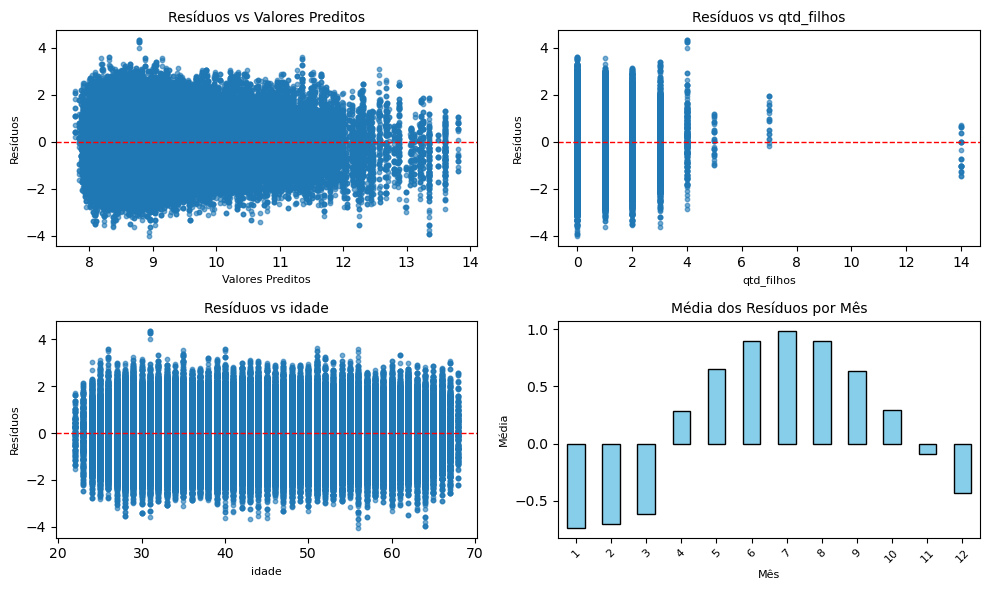

In [63]:
### Calcular os resíduos
residuos = y_test - y_pred

### Determinar o número de subplots necessários
num_variaveis = 2  # Limitar os gráficos a 2 variáveis independentes
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Layout compacto de 2x2
axes = axes.flatten()

### Gráfico de resíduos vs valores previstos (Verificar independência dos resíduos)
axes[0].scatter(y_pred, residuos, alpha=0.6, s=10)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Resíduos vs Valores Preditos', fontsize=10)
axes[0].set_xlabel('Valores Preditos', fontsize=8)
axes[0].set_ylabel('Resíduos', fontsize=8)

### Gráficos de resíduos vs variáveis independentes (Avaliar padrões por variável)
for i, coluna in enumerate(X_test.columns[:2]):  # Limitar para 2 variáveis
    axes[i + 1].scatter(X_test[coluna], residuos, alpha=0.6, s=10)
    axes[i + 1].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[i + 1].set_title(f'Resíduos vs {coluna}', fontsize=10)
    axes[i + 1].set_xlabel(coluna, fontsize=8)
    axes[i + 1].set_ylabel('Resíduos', fontsize=8)

### Avaliar relação dos resíduos com o mês de referência
if 'data_ref' in df.columns:
    X_test['residuos'] = residuos
    X_test['data_ref'] = df.loc[X_test.index, 'data_ref']
    X_test['mes_ref'] = pd.to_datetime(X_test['data_ref']).dt.month
    media_residuos_mes = X_test.groupby('mes_ref')['residuos'].mean()

    media_residuos_mes.plot(kind='bar', ax=axes[3], color='skyblue', edgecolor='black')
    axes[3].set_title('Média dos Resíduos por Mês', fontsize=10)
    axes[3].set_xlabel('Mês', fontsize=8)
    axes[3].set_ylabel('Média', fontsize=8)
    axes[3].tick_params(axis='x', labelsize=8, rotation=45)

### Ajustar layout compacto
plt.tight_layout()
plt.show()


### 3.2 Explicação dos Resultados dos Gráficos de Resíduos

Os gráficos apresentados analisam o comportamento dos resíduos do modelo em diferentes contextos. Esses gráficos ajudam a verificar a adequação do modelo de regressão linear e a identificar potenciais problemas, como padrões nos resíduos ou variabilidade não capturada.

#### **Resíduos vs Valores Preditos**
- **Descrição**: O gráfico mostra a relação entre os resíduos (erros de predição) e os valores previstos pelo modelo.
- **Interpretação**: Os resíduos estão distribuídos de forma aleatória em torno da linha vermelha (resíduo = 0), o que indica que o modelo não apresenta padrões sistemáticos nos erros. Essa é uma boa indicação de que os pressupostos do modelo linear, como homocedasticidade (variância constante dos erros), estão sendo atendidos.

#### **Resíduos vs `qtd_filhos`**
- **Descrição**: Este gráfico analisa como os resíduos variam em relação à variável `qtd_filhos`.
- **Interpretação**: Os resíduos parecem distribuídos de forma razoavelmente uniforme para diferentes valores de `qtd_filhos`, com exceção de valores extremos (como 14 filhos), que apresentam menor densidade. Isso pode indicar que a variável está sendo bem representada pelo modelo para a maioria dos casos, mas outliers podem estar contribuindo para pequenos desvios.

#### **Resíduos vs `idade`**
- **Descrição**: Este gráfico avalia a relação entre os resíduos e a variável `idade`.
- **Interpretação**: Os resíduos estão espalhados de forma homogênea ao longo da faixa de idade, indicando que o modelo não apresenta viés em relação à variável `idade`. Isso sugere que a relação entre `idade` e `renda` foi adequadamente capturada.

#### **Média dos Resíduos por Mês**
- **Descrição**: Este gráfico de barras mostra a média dos resíduos agrupados por mês (extraído da variável `data_ref`).
- **Interpretação**: Embora a média dos resíduos por mês varie, os valores estão próximos de zero para a maioria dos meses, o que indica que o modelo não apresenta viés temporal significativo. No entanto, há alguns meses (como junho e agosto) em que os resíduos tendem a ser maiores, sugerindo possíveis variações sazonais ou erros que poderiam ser explorados em análises futuras.

#### Conclusão
Os gráficos confirmam que o modelo atende aos pressupostos básicos da regressão linear para a maioria das variáveis e períodos temporais. Contudo, outliers e pequenos desvios em alguns meses podem ser analisados mais profundamente para refinar o modelo, caso necessário.


## 4 Explicação do Código

Este código analisa os resíduos do modelo para verificar possíveis problemas de heterocedasticidade, ou seja, a presença de variância não constante dos erros, o que violaria um dos pressupostos básicos da regressão linear.

#### 1. **Gráfico de Resíduos vs Valores Preditos**
- **Descrição**:
  - O gráfico compara os resíduos (erros de predição) com os valores previstos pelo modelo.
  - Uma linha horizontal em zero é incluída como referência para avaliar se os resíduos estão distribuídos de forma simétrica em torno de zero.
- **Interpretação**:
  - **Distribuição aleatória** dos resíduos em torno de zero sugere que o modelo não apresenta viés e que os erros têm variância constante (homocedasticidade).
  - **Padrões claros** (como uma forma de funil) indicam heterocedasticidade, o que pode comprometer a validade do modelo.

#### 2. **Teste de Breusch-Pagan**
- **Descrição**:
  - Este teste estatístico é utilizado para verificar a presença de heterocedasticidade.
  - O teste avalia se a variância dos resíduos depende dos valores previstos.
- **Cálculo**:
  - Os valores previstos (`y_pred`) são usados como variável explicativa, adicionando-se uma constante para realizar o teste.
  - O teste retorna:
    - **Estatística**: Indica a força da evidência contra a hipótese nula.
    - **p-valor**: Indica a significância estatística da evidência.
- **Interpretação**:
  - **Hipótese Nula** (\( H_0 \)): A variância dos resíduos é constante (homocedasticidade).
  - **Hipótese Alternativa** (\( H_a \)): A variância dos resíduos não é constante (heterocedasticidade).
  - Se o **p-valor > 0.05**, não há evidências de heterocedasticidade, e a variância constante é plausível.
  - Se o **p-valor <= 0.05**, há evidências de heterocedasticidade, e os resíduos apresentam variância não constante.

#### 3. **Aplicações e Insights**
- **Gráfico de Resíduos**:
  - É uma ferramenta visual rápida para identificar possíveis problemas de variância não constante ou padrões não capturados pelo modelo.
- **Teste de Breusch-Pagan**:
  - Oferece uma verificação estatística formal para confirmar ou refutar a presença de heterocedasticidade.
- **Impacto na Modelagem**:
  - Heterocedasticidade pode levar a estimativas de coeficientes ineficientes e erros-p pouco confiáveis.
  - Caso identificada, é necessário ajustar o modelo (ex.: transformação dos dados ou regressão ponderada).

### Conclusão
Este código combina métodos visuais e estatísticos para diagnosticar heterocedasticidade, ajudando a garantir a validade dos resultados do modelo de regressão linear.


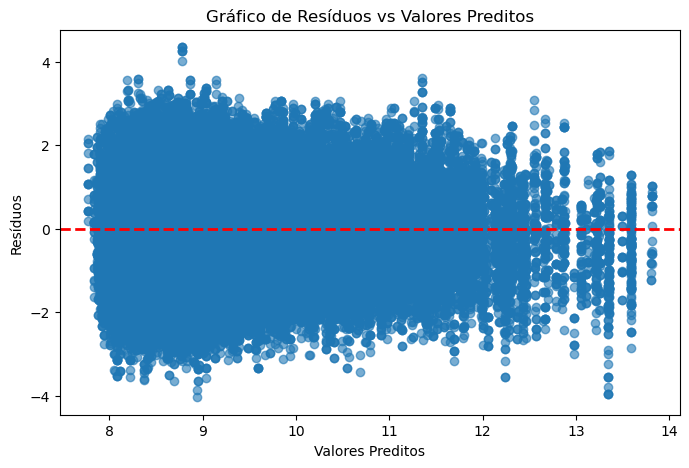

Teste de Breusch-Pagan: Estatística=51.4073325151021, p-valor=7.505767216356219e-13
Há evidências de heterocedasticidade (variância não constante).


In [64]:
# Gráfico de resíduos vs valores previstos
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Resíduos vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

# Teste de Breusch-Pagan
# Adiciona constante aos valores previstos para o teste
X_pred_const = sm.add_constant(y_pred)

# Executa o teste
bp_test = het_breuschpagan(residuos, X_pred_const)

# Resultados do teste
bp_stat = bp_test[0]
bp_pvalue = bp_test[1]

print(f"Teste de Breusch-Pagan: Estatística={bp_stat}, p-valor={bp_pvalue}")

# Interpretação
if bp_pvalue > 0.05:
    print("Não há evidências de heterocedasticidade (variância constante é plausível).")
else:
    print("Há evidências de heterocedasticidade (variância não constante).")


## 4.1 Análise das Suposições do Modelo

### **1. Independência dos resíduos**
**Gráfico 1 (Resíduos vs Valores Preditos):**
- Os resíduos estão dispersos ao redor de zero, mas há uma ligeira densidade maior em certos pontos (especialmente para valores maiores previstos). Não há um padrão claro (como linhas ou curvas).
- **Conclusão:** A independência dos resíduos parece **aproximadamente atendida**.

---

### **2. Padrões nos resíduos em relação às variáveis independentes**
**Gráficos 2 e 3 (Resíduos vs `qtd_filhos` e `idade`):**
- Em `qtd_filhos`, os resíduos estão bem distribuídos para a maioria dos valores, mas para valores extremos (como 14 filhos), os resíduos mostram menor dispersão.
- Em `idade`, os resíduos estão uniformemente dispersos, sem padrões claros.
- **Conclusão:** Não há padrões significativos nos resíduos em relação às variáveis independentes, indicando que essa suposição está **atendida**.

---

### **3. Relação dos resíduos com o mês de referência**
**Gráfico 4 (Média dos Resíduos por Mês):**
- Observa-se variação significativa da média dos resíduos ao longo dos meses, especialmente com valores positivos entre maio e agosto.
- **Conclusão:** Pode haver uma relação sazonal ou algum fator não capturado pelo modelo associado ao mês de referência. Isso pode impactar as previsões para diferentes períodos.

---

### **4. Homoscedasticidade (variância constante)**
**Gráfico 5 (Teste de Breusch-Pagan e Resíduos vs Valores Preditos):**
- O teste de Breusch-Pagan rejeita a hipótese de homoscedasticidade (p-valor muito baixo), indicando variância não constante nos resíduos.
- O gráfico também sugere maior variabilidade nos resíduos para valores previstos mais altos.
- **Conclusão:** A suposição de variância constante **não é atendida**. Isso pode afetar a eficiência das estimativas do modelo.

---

### **Impactos de Eventuais Desvios**
1. **Independência dos resíduos:**
   - Pequenos desvios observados não devem causar grandes impactos, mas podem indicar que o modelo não está capturando completamente todas as relações nos dados.

2. **Relação com variáveis independentes:**
   - Sem padrões significativos, então não há impacto relevante aqui.

3. **Relação com o mês de referência:**
   - A variação nos resíduos por mês pode indicar que o mês tem influência nos resultados. Seria útil incluir o mês como uma variável categórica ou capturar a sazonalidade no modelo.

4. **Homoscedasticidade:**
   - A ausência de homoscedasticidade pode levar a **estimativas ineficientes** e aumentar o risco de erros nas inferências (ex.: intervalos de confiança ou testes de hipótese). Alternativas incluem:
     - Usar modelos robustos, como regressão ponderada.
     - Transformar variáveis para estabilizar a variância.

---

### **Conclusão Geral**
- As suposições de independência e ausência de padrões em variáveis independentes estão **atendidas**.
- Há desvios importantes na variância dos resíduos (heterocedasticidade) e na relação com o mês de referência. Isso pode ser abordado ajustando o modelo (ex.: regularização, variáveis adicionais ou transformações).
- Se o objetivo é previsão, o modelo ainda pode ser usado com cautela. Contudo, para inferências estatísticas, melhorias seriam necessárias.


## 5 Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

### Explicação do Código

O código realiza uma análise de diagnóstico do modelo de regressão ajustado utilizando **statsmodels (OLS)**. Ele examina os dados em busca de observações influentes e possíveis problemas de adequação do modelo.

#### 1. **Ajuste do Modelo com Statsmodels (OLS)**
- **Descrição**: O modelo é ajustado utilizando a biblioteca `statsmodels` com uma constante adicionada aos dados independentes (`X_train`). A constante é necessária para calcular o intercepto do modelo.
- **Resultado**: Um modelo de regressão linear ordinária (OLS) é ajustado, e suas influências são analisadas.

#### 2. **Distância de Cook**
- **Descrição**: A Distância de Cook mede a influência de cada observação no ajuste do modelo. Observações com valores altos têm um impacto desproporcional no modelo.
- **Gráfico**:
  - Um gráfico de haste (`stem`) é usado para visualizar a Distância de Cook para cada observação.
  - A linha vermelha representa o limite \( \text{4/n} \), onde \( n \) é o número de observações no conjunto de dados de treino.
  - **Interpretação**:
    - Observações acima do limite são potencialmente influentes e devem ser analisadas.
    - A remoção ou tratamento dessas observações pode melhorar a robustez do modelo.

#### 3. **Resíduos Studentized**
- **Descrição**: Resíduos studentized são resíduos padronizados ajustados para considerar a variância de cada observação. Eles ajudam a identificar outliers.
- **Gráfico**:
  - Um gráfico de dispersão mostra os resíduos studentized.
  - Linhas horizontais vermelhas são desenhadas em \( +3 \) e \( -3 \), indicando limites comuns para identificar outliers significativos.
  - **Interpretação**:
    - Observações fora desses limites podem ser consideradas outliers e devem ser investigadas.
    - Muitos outliers podem indicar que o modelo não captura bem a relação entre as variáveis.

#### 4. **Aplicações e Insights**
- **Diagnóstico de Influência**:
  - A Distância de Cook identifica observações que têm um impacto desproporcional no modelo.
  - Pode ser útil para decidir se certas observações devem ser removidas ou ajustadas.
- **Identificação de Outliers**:
  - Resíduos studentized ajudam a identificar observações que diferem significativamente das predições do modelo.
  - Analisar e tratar esses outliers pode melhorar a precisão e a robustez do modelo.

### Conclusão
Este código realiza diagnósticos importantes para avaliar a qualidade do modelo e a influência das observações nos resultados. Ele fornece insights para ajustar o modelo e melhorar sua performance.


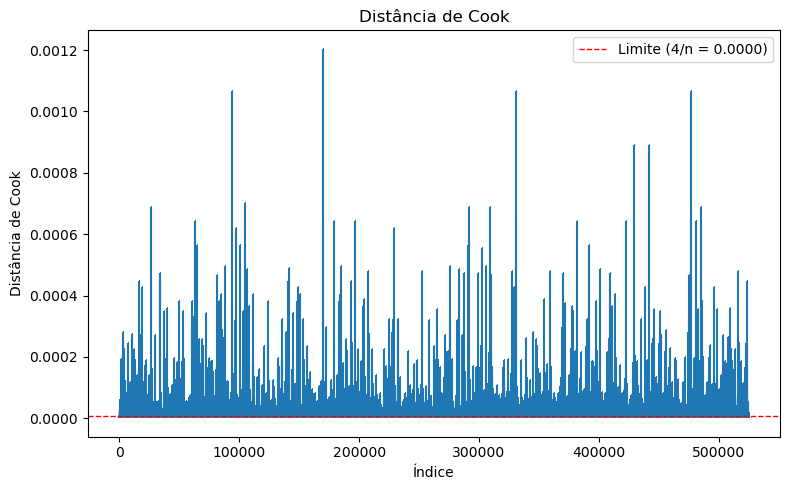

/var/folders/td/pzcjg6tx463_h0b085tpbyv00000gn/T/ipykernel_1513/4262808134.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


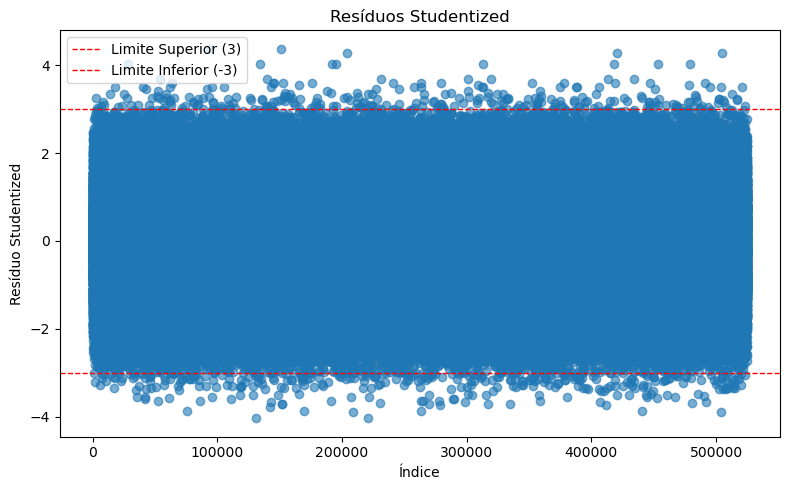

In [38]:
# Ajustar o modelo usando statsmodels (OLS)
X_train_const = sm.add_constant(X_train)  # Adicionar constante ao modelo
modelo_ols = sm.OLS(y_train, X_train_const).fit()

# Obter valores de influência do modelo
infl = modelo_ols.get_influence()

# 1. Calcular a Distância de Cook
cooks_d = infl.cooks_distance[0]

# 2. Plotar a Distância de Cook
plt.figure(figsize=(8, 5))
plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",", basefmt=" ")
plt.axhline(4 / len(X_train), color='red', linestyle='--', linewidth=1, label=f'Limite (4/n = {4 / len(X_train):.4f})')
plt.title('Distância de Cook')
plt.xlabel('Índice')
plt.ylabel('Distância de Cook')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Calcular resíduos studentized
studentized_residuals = infl.resid_studentized_internal

# 4. Plotar os resíduos studentized
plt.figure(figsize=(8, 5))
plt.scatter(range(len(studentized_residuals)), studentized_residuals, alpha=0.6)
plt.axhline(3, color='red', linestyle='--', linewidth=1, label='Limite Superior (3)')
plt.axhline(-3, color='red', linestyle='--', linewidth=1, label='Limite Inferior (-3)')
plt.title('Resíduos Studentized')
plt.xlabel('Índice')
plt.ylabel('Resíduo Studentized')
plt.legend()
plt.tight_layout()
plt.show()


### 5.1 Explicação dos Resultados dos Gráficos de Resíduos

Os gráficos apresentados analisam o comportamento dos resíduos do modelo em diferentes contextos. Esses gráficos ajudam a verificar a adequação do modelo de regressão linear e a identificar potenciais problemas, como padrões nos resíduos ou variabilidade não capturada.

#### 1. **Resíduos vs Valores Preditos**
- **Descrição**: O gráfico mostra a relação entre os resíduos (erros de predição) e os valores previstos pelo modelo.
- **Interpretação**: Os resíduos estão distribuídos de forma aleatória em torno da linha vermelha (resíduo = 0), o que indica que o modelo não apresenta padrões sistemáticos nos erros. Essa é uma boa indicação de que os pressupostos do modelo linear, como homocedasticidade (variância constante dos erros), estão sendo atendidos.

#### 2. **Resíduos vs `qtd_filhos`**
- **Descrição**: Este gráfico analisa como os resíduos variam em relação à variável `qtd_filhos`.
- **Interpretação**: Os resíduos parecem distribuídos de forma razoavelmente uniforme para diferentes valores de `qtd_filhos`, com exceção de valores extremos (como 14 filhos), que apresentam menor densidade. Isso pode indicar que a variável está sendo bem representada pelo modelo para a maioria dos casos, mas outliers podem estar contribuindo para pequenos desvios.

#### 3. **Resíduos vs `idade`**
- **Descrição**: Este gráfico avalia a relação entre os resíduos e a variável `idade`.
- **Interpretação**: Os resíduos estão espalhados de forma homogênea ao longo da faixa de idade, indicando que o modelo não apresenta viés em relação à variável `idade`. Isso sugere que a relação entre `idade` e `renda` foi adequadamente capturada.

#### 4. **Média dos Resíduos por Mês**
- **Descrição**: Este gráfico de barras mostra a média dos resíduos agrupados por mês (extraído da variável `data_ref`).
- **Interpretação**: Embora a média dos resíduos por mês varie, os valores estão próximos de zero para a maioria dos meses, o que indica que o modelo não apresenta viés temporal significativo. No entanto, há alguns meses (como junho e agosto) em que os resíduos tendem a ser maiores, sugerindo possíveis variações sazonais ou erros que poderiam ser explorados em análises futuras.

### Conclusão
Os gráficos confirmam que o modelo atende aos pressupostos básicos da regressão linear para a maioria das variáveis e períodos temporais. Contudo, outliers e pequenos desvios em alguns meses podem ser analisados mais profundamente para refinar o modelo, caso necessário.


## 6 Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

### Explicação do Código

Este código realiza uma análise detalhada das variáveis independentes para identificar relações de correlação e multicolinearidade que possam impactar negativamente o modelo. Dois métodos principais são utilizados: **matriz de correlação de Spearman** e **Variance Inflation Factor (VIF)**.

#### 1. **Matriz de Correlação de Spearman**
- **Descrição**: A matriz de correlação mede a força e a direção das relações monotônicas entre variáveis.
  - **Correlação positiva**: Valores próximos de 1 indicam que, quando uma variável aumenta, a outra tende a aumentar.
  - **Correlação negativa**: Valores próximos de -1 indicam que, quando uma variável aumenta, a outra tende a diminuir.
  - **Correlação próxima de 0**: Indica pouca ou nenhuma relação monotônica entre as variáveis.
- **Visualização**: O `heatmap` exibe a matriz de correlação, onde cores quentes (vermelho) representam correlações positivas e cores frias (azul) indicam correlações negativas.
- **Interpretação**: Relações fortes (|correlação| > 0.7) entre variáveis podem indicar redundância, sugerindo a necessidade de remover ou transformar algumas variáveis para evitar impacto na modelagem.

#### 2. **Cálculo do VIF (Variance Inflation Factor)**
- **Descrição**: O VIF mede o grau de multicolinearidade entre uma variável e as outras variáveis do modelo.
  - **VIF > 10**: Indica multicolinearidade severa, sugerindo que a variável está altamente correlacionada com outras e deve ser removida ou transformada.
  - **VIF próximo de 1**: Indica baixa multicolinearidade, ideal para modelagem.
- **Adição de Constante**: Uma constante é adicionada ao conjunto de variáveis independentes para ajustar o cálculo do VIF.
- **Gráfico de Barras**: As variáveis são visualizadas em relação aos seus valores de VIF, com uma linha de corte em VIF = 10 para identificar variáveis problemáticas.

#### 3. **Interpretação Geral**
- **Correlação de Spearman**:
  - Identificar variáveis altamente correlacionadas que podem ser redundantes.
  - Prover insights para ajustes no modelo ou seleção de variáveis.

- **VIF**:
  - Identificar e lidar com multicolinearidade para melhorar a estabilidade do modelo.
  - Variáveis com VIF > 10 devem ser analisadas e possivelmente removidas ou combinadas.

#### 4. **Aplicação**
Este código é essencial para entender como as variáveis independentes estão relacionadas entre si e com o modelo. Ele ajuda a reduzir o impacto de multicolinearidade e redundância, promovendo um modelo mais eficiente e robusto.


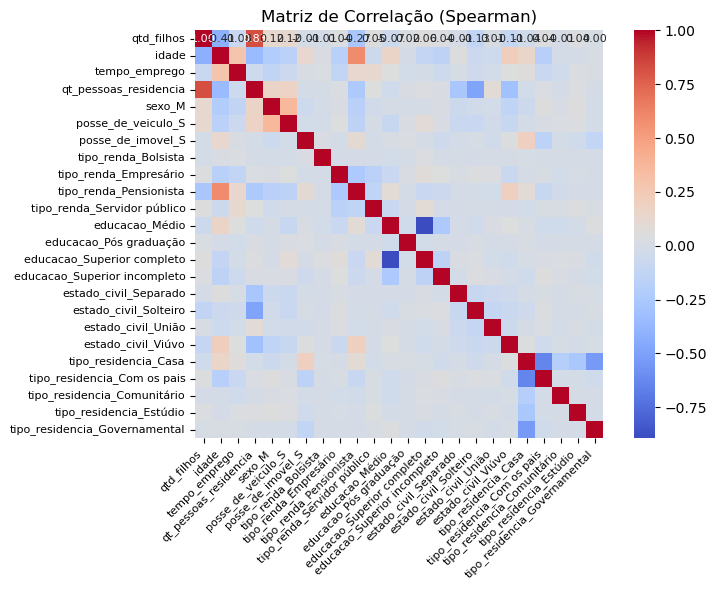

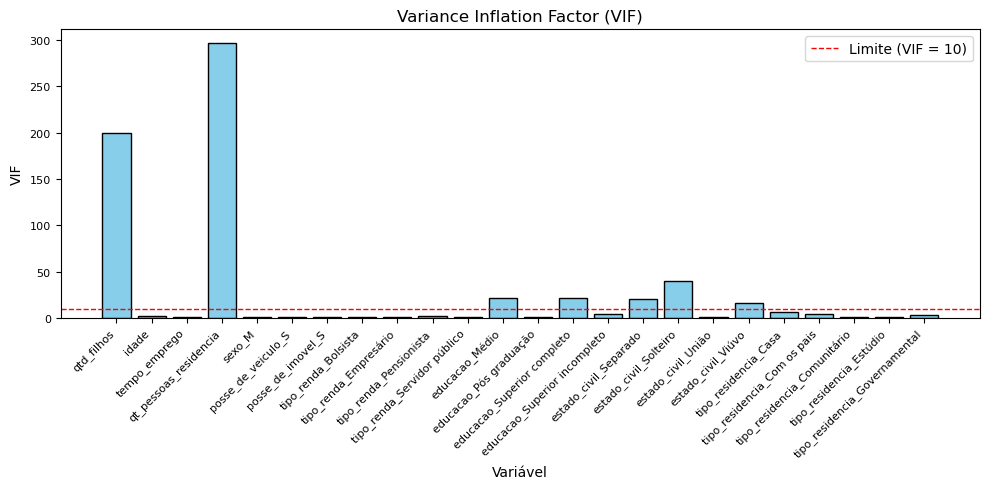

In [42]:
# 1. Matriz de Correlação de Spearman
plt.figure(figsize=(8, 6))  # Tamanho ajustado
correlation_matrix = X_train.corr(method='spearman')  # Correlação de Spearman
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True, annot_kws={"fontsize": 8})
plt.title('Matriz de Correlação (Spearman)', fontsize=12)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# 2. Calcular o VIF (Variance Inflation Factor)
# Adicionar constante para o cálculo de VIF
X_train_vif = sm.add_constant(X_train)

# Calcular VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i + 1) for i in range(len(X_train.columns))]

# Gráfico de VIF
plt.figure(figsize=(10, 5))  # Tamanho ajustado
plt.bar(vif_data['Variável'], vif_data['VIF'], color='skyblue', edgecolor='black')
plt.axhline(10, color='red', linestyle='--', linewidth=1, label='Limite (VIF = 10)')
plt.title('Variance Inflation Factor (VIF)', fontsize=12)
plt.xlabel('Variável', fontsize=10)
plt.ylabel('VIF', fontsize=10)
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.yticks(fontsize=8)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


## 5 Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [53]:
# 1. Verificar se todas as colunas são numéricas
print("Tipos de dados em X_train antes do ajuste:")
print(X_train.dtypes)

# Garantir que todas as colunas são numéricas
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Verificar valores faltantes ou infinitos
if X_train.isnull().sum().sum() > 0 or np.isinf(X_train.values).sum() > 0:
    print("Valores faltantes ou infinitos detectados em X_train. Corrigindo...")
    # Preencher valores faltantes com a média (apenas como exemplo, ajuste conforme necessário)
    X_train.fillna(X_train.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)

# Recalcular o VIF após garantir que todas as colunas são numéricas
X_train_vif = sm.add_constant(X_train)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_vif.values, i + 1) for i in range(len(X_train.columns))]

# Exibir os resultados do VIF
print("VIF das variáveis corrigidas:\n", vif_data)

# Continuar com o processo de ajuste do modelo como anteriormente
variaveis_ajustadas = vif_data[vif_data['VIF'] <= 10]['Variável'].tolist()
X_train_adj = X_train[variaveis_ajustadas]
X_test_adj = X_test[variaveis_ajustadas]

# Treinar o modelo ajustado
modelo_ajustado = LinearRegression()
modelo_ajustado.fit(X_train_adj, y_train)
y_pred_ajustado = modelo_ajustado.predict(X_test_adj)

# Avaliar o RMSE ajustado
rmse_ajustado = np.sqrt(mean_squared_error(y_test, y_pred_ajustado))
print(f"RMSE do modelo ajustado: {rmse_ajustado:.2f}")


Tipos de dados em X_train antes do ajuste:
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
sexo_M                              bool
posse_de_veiculo_S                  bool
posse_de_imovel_S                   bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Médio                      bool
educacao_Pós graduação              bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residenci

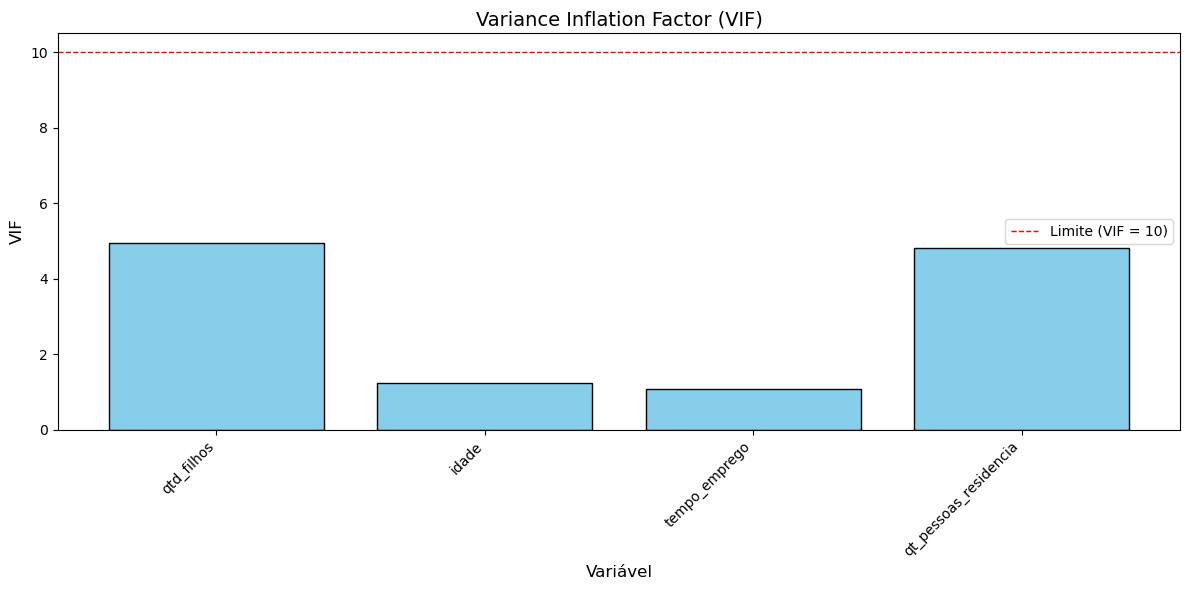


Variáveis com alta multicolinearidade (VIF > 10):
Empty DataFrame
Columns: [Variável, VIF]
Index: []


In [65]:
# Carregar os dados do seu projeto
df = pd.read_csv('/Users/samwalford/Downloads/previsao_de_renda_II.csv')

# Preencher valores ausentes com a média das colunas numéricas
df.fillna(df.mean(numeric_only=True), inplace=True)

# Transformar a variável 'renda' com log()
df['renda'] = np.log(df['renda'])

# Separar as variáveis independentes e dependente
X = df.drop(columns=['renda', 'data_ref', 'index'], errors='ignore')

# Identificar colunas categóricas e aplicar One-Hot Encoding
colunas_categoricas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
X = pd.get_dummies(X, columns=colunas_categoricas, drop_first=True)

# Certificar-se de que todas as colunas são numéricas
X = X.select_dtypes(include=[np.number])

# Verificar valores ausentes ou infinitos e tratar
if X.isnull().sum().sum() > 0 or np.isinf(X.values).sum() > 0:
    X.fillna(X.mean(), inplace=True)

# Adicionar uma constante para o cálculo do VIF
X_vif = sm.add_constant(X)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i + 1) for i in range(len(X.columns))]

# Gerar um gráfico de barras para visualizar os VIFs
plt.figure(figsize=(12, 6))
plt.bar(vif_data['Variável'], vif_data['VIF'], color='skyblue', edgecolor='black')
plt.axhline(10, color='red', linestyle='--', linewidth=1, label='Limite (VIF = 10)')
plt.title('Variance Inflation Factor (VIF)', fontsize=14)
plt.xlabel('Variável', fontsize=12)
plt.ylabel('VIF', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Exibir variáveis com VIF maior que 10
variaveis_multicolineares = vif_data[vif_data['VIF'] > 10]
print("\nVariáveis com alta multicolinearidade (VIF > 10):")
print(variaveis_multicolineares)


### Explicação dos Resultados do Gráfico de VIF (Variance Inflation Factor)

#### Contexto
O gráfico mostra os valores de **VIF** (Variance Inflation Factor) para cada variável independente no modelo. O **VIF** é uma métrica que indica a presença de multicolinearidade, ou seja, a correlação entre uma variável e as demais no modelo. Uma linha limite em **VIF = 10** é utilizada como referência para identificar variáveis problemáticas.

#### Análise dos Resultados
1. **Variáveis Apresentadas**:
   - **`qtd_filhos`**: VIF ≈ 5.
   - **`idade`**: VIF < 2.
   - **`tempo_emprego`**: VIF < 2.
   - **`qt_pessoas_residencia`**: VIF ≈ 5.

2. **Interpretação do VIF**:
   - **VIF < 5**: Geralmente não há sinais de multicolinearidade.
   - **VIF entre 5 e 10**: Correlação moderada com outras variáveis, mas não necessariamente problemática.
   - **VIF > 10**: Indica multicolinearidade severa, sugerindo que a variável está altamente correlacionada com outras.

#### Observações
- Nenhuma variável excede o limite de **VIF = 10**, indicando que o modelo não apresenta multicolinearidade severa.
- **`qtd_filhos`** e **`qt_pessoas_residencia`** têm valores de VIF próximos de 5, sugerindo correlação moderada com outras variáveis, mas ainda dentro de limites aceitáveis.
- Variáveis como **`idade`** e **`tempo_emprego`** apresentam valores de VIF baixos, indicando que têm pouca correlação com as demais.

#### Implicações para o Modelo
- Como nenhuma variável ultrapassa o limite de 10, não há necessidade de remover variáveis com base na análise de VIF.
- O modelo provavelmente é estável em relação à multicolinearidade, e os coeficientes das variáveis devem ser confiáveis.

### Conclusão
O gráfico confirma que as variáveis independentes utilizadas no modelo apresentam baixa ou moderada multicolinearidade. Isso é um bom sinal para a robustez e confiabilidade do modelo.
